In [1]:
import time

start_time = time.time()
import jax
import numpy as np
import jax.numpy as jnp
from jax import random
from jax import grad, jit, vmap
import scipy.io
from collections import namedtuple
import time
from functools import partial
import matplotlib.pyplot as plt
from init import load_data, setup_model, mmt,plotyield

[data, date, yielddata, yieldmaturity, infl, x, cy_diff, ynom15y, ynom20y, ynom30y] = load_data()
nparam = 20

In [2]:
start_time = time.time()
# values of convenience yields
allcy = [i * 0.05 for i in range(int(2.5 / 0.05) + 1)]
cylen = len(allcy)

# Load results.mat equivalent in Python
results = scipy.io.loadmat('results.mat')
# Extracting data from results (assuming similar structure)
minparamval = results['minparamval']
maxval = len(minparamval[0])

idx = 0
cy = allcy[idx] * cy_diff
param = minparamval[:, idx]

# Setup model (assuming setup_model returns these values)
(N, T, Psi, Sig, I_pi, I_gdp, I_y1, I_yspr, I_cy, inflpos, gdppos, y1pos, 
 ysprpos, pi0, x0, ynom1q0, yspr0, cy0, X2, yielddata, yieldmaturity, eps2) = setup_model(yielddata, yieldmaturity, cy, [], [], infl, x, [], [])

Data = data(Psi, Sig, I_pi, I_gdp, I_y1, I_yspr, I_cy, inflpos, gdppos, y1pos,ysprpos, pi0, x0, ynom1q0, yspr0, cy0, X2, yielddata, yieldmaturity, eps2)

# Call the mmt function with these parameters
result = mmt(param,N,T,Data)
# Process or print the result as needed
print(result) 
end_time = time.time()
print("Elapsed time:", end_time - start_time)

460.67325
Elapsed time: 6.885521173477173


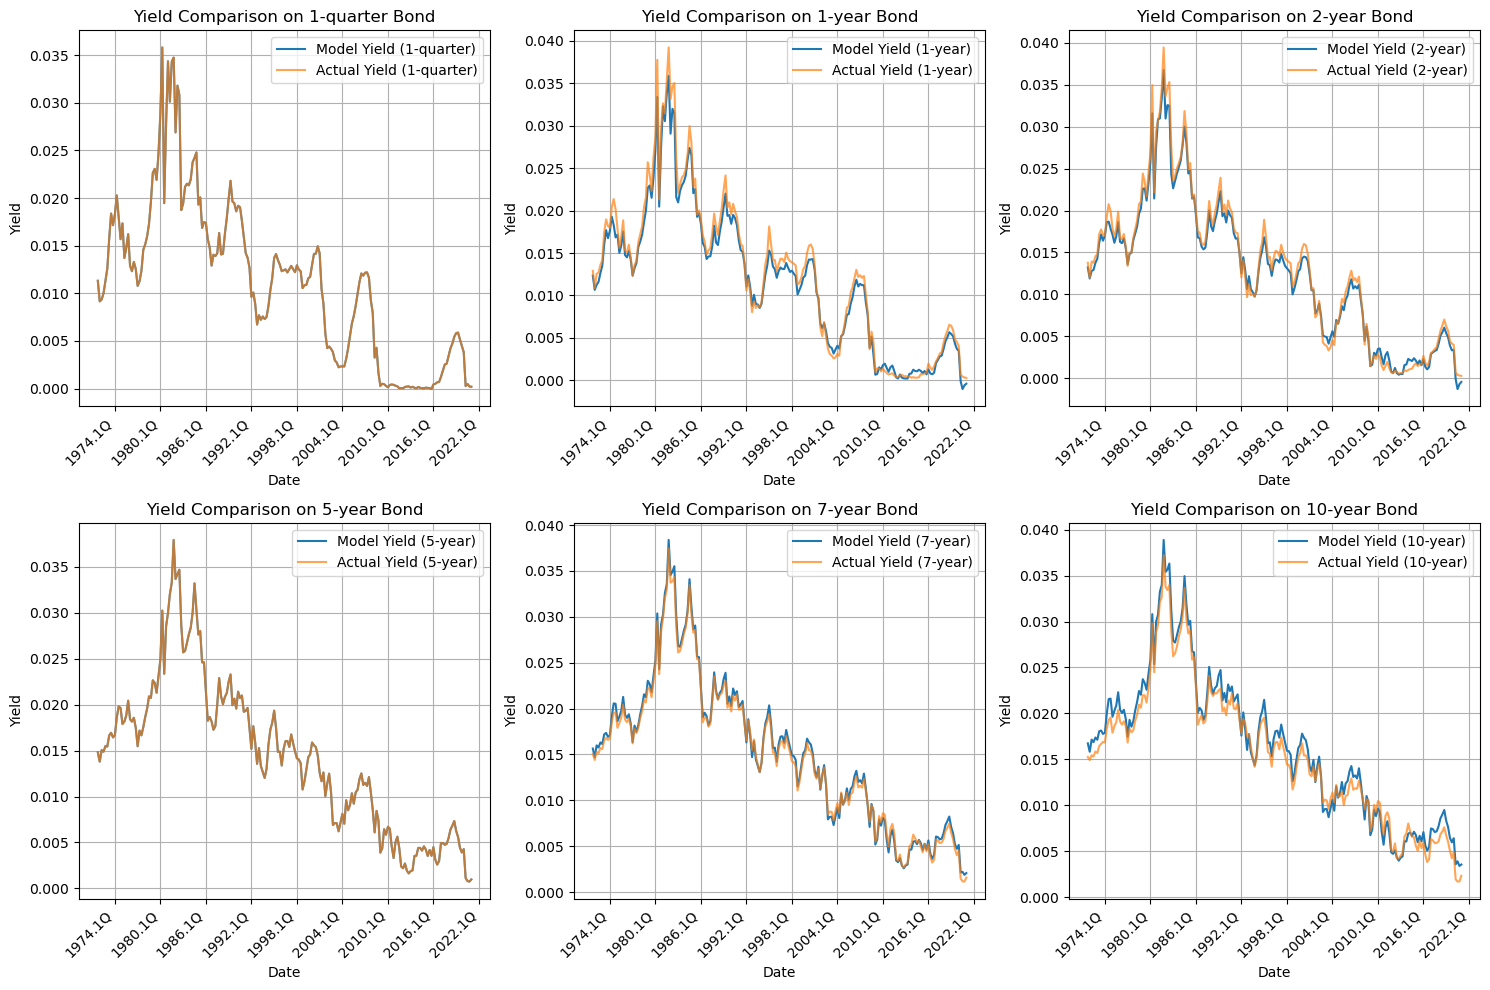

In [5]:
plotyield(param, N, T, Data)

In [9]:
import optax

# main
adam = optax.adam(learning_rate=.01)
losses = []

param1 = param * 0
param1[0] = 0.25
param1[1] = 0.25
param1[2] = 0.25
param1[3] = 0.25
param1

opt_state = adam.init(param1)
# mmt(param1,N,T,Data)

steps = 10000
for i in range(steps):
    loss, gradient = jax.value_and_grad(mmt)(param1, N,T,Data)
    updates, opt_state = adam.update(gradient, opt_state)
    param1 += updates
    losses.append(loss)
    if ((i+1) % 1 == 0):
        print(f"Step {i}, loss {loss}")

# save both opt_state and param1 into a file

Step 0, loss 7037840384.0
Step 1, loss 5653983744.0
Step 2, loss 4355766784.0
Step 3, loss 3170490624.0
Step 4, loss 2129188352.0
Step 5, loss 1267989376.0
Step 6, loss 629372864.0
Step 7, loss 259095744.0
Step 8, loss 188601744.0
Step 9, loss 387477344.0
Step 10, loss 707321792.0
Step 11, loss 939651456.0
Step 12, loss 976485888.0
Step 13, loss 844871104.0
Step 14, loss 631404800.0
Step 15, loss 417966336.0
Step 16, loss 255533136.0
Step 17, loss 162486384.0
Step 18, loss 133601392.0
Step 19, loss 151336656.0
Step 20, loss 194864656.0
Step 21, loss 245680128.0
Step 22, loss 290002880.0
Step 23, loss 319260320.0
Step 24, loss 329513152.0
Step 25, loss 320546432.0
Step 26, loss 294951552.0
Step 27, loss 257290976.0
Step 28, loss 213336784.0
Step 29, loss 169314208.0
Step 30, loss 131097368.0
Step 31, loss 103340360.0
Step 32, loss 88639448.0
Step 33, loss 86907336.0
Step 34, loss 95254120.0
Step 35, loss 108614752.0
Step 36, loss 121118208.0
Step 37, loss 127826304.0
Step 38, loss 12616

In [11]:
adam = optax.adam(learning_rate=.001)
losses = []
opt_state = adam.init(param1)

steps = 10000
i = 0
for i in range(steps):
    loss, gradient = jax.value_and_grad(mmt)(param1, N,T,Data)
    updates, opt_state = adam.update(gradient, opt_state)
    param1 += updates
    losses.append(loss)
    if ((i+1) % 1 == 0):
        print(f"Step {i}, loss {loss}")


Step 0, loss 11107.357421875
Step 1, loss 877396.5
Step 2, loss 67307.7421875
Step 3, loss 191084.71875
Step 4, loss 506533.90625
Step 5, loss 400028.71875
Step 6, loss 133730.515625
Step 7, loss 11760.4658203125
Step 8, loss 103098.4765625
Step 9, loss 238224.75
Step 10, loss 246679.75
Step 11, loss 139707.109375
Step 12, loss 34090.65625
Step 13, loss 17342.98828125
Step 14, loss 78855.3125
Step 15, loss 136965.328125
Step 16, loss 131220.3125
Step 17, loss 73860.1796875
Step 18, loss 21398.705078125
Step 19, loss 15878.119140625
Step 20, loss 49844.3671875
Step 21, loss 80198.2578125
Step 22, loss 75024.640625
Step 23, loss 42376.703125
Step 24, loss 15068.1103515625
Step 25, loss 15463.0947265625
Step 26, loss 35860.25390625
Step 27, loss 50555.5390625
Step 28, loss 44040.85546875
Step 29, loss 24574.326171875
Step 30, loss 11967.8017578125
Step 31, loss 16145.427734375
Step 32, loss 28571.625
Step 33, loss 33656.95703125
Step 34, loss 26132.826171875
Step 35, loss 14941.552734375


In [ ]:
import pickle
# save param1 into csv file
np.savetxt("param1.csv", param1, delimiter=",")

with open('param1.pkl') as handle:
    pickle.dump(param1, opt_state, handle, protocol=pickle.HIGHEST_PROTOCOL)



# 1. if we confirm consistency between jax and matlab, we can try compare their speed by starting from
# the same randomly generated parameters and checking the time it takes to converge
# NOT YET 2. try this for different values of cy

NameError: name 'np' is not defined